# Домашнее задание 4

Менгден Алексей, MAEE'19

In [1]:
import requests
import re
import zipfile
import pandas as pd
import os
import numpy as np
import sys
from collections import Counter
import warnings
import urllib
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://drive.google.com/uc?export= download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
response = requests.get(url) 
filename = re.findall("filename=\"(.*?\.zip)", response.headers['content-disposition'] )[0]
path = os.getcwd()
os.makedirs(path, exist_ok = True)
zf = zipfile.ZipFile(path + filename)
if not os.path.isfile(path + filename):
        with open(filepath, "wb") as file:
            file.write(response.content)
public_csv = pd.read_csv(zf.open('survey_results_public.csv'))
schema_csv = pd.read_csv(zf.open('survey_results_schema.csv'))

## 1.

Сколько вопросов было в опросе? 

In [3]:
schema_csv.shape[0]

154

Сколько разработчиков приняло участие в нем?

In [4]:
public_csv['Respondent'].unique().shape[0]

51392

## 2.

Покажите число участников опроса по странам и выведите 10 стран с наибольшим числом респондентов

In [5]:
public_csv.groupby('Country')['Country'].agg(len).sort_values()[::-1][:10]

Country
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64

Их доля в общем количестве

In [6]:
public_csv.groupby('Country')['Country'].agg(len).sort_values()[::-1][:10] / len(public_csv)

Country
United States         0.222895
India                 0.101125
United Kingdom        0.085519
Germany               0.080616
Canada                0.043450
France                0.033857
Poland                0.025101
Australia             0.017765
Russian Federation    0.016987
Spain                 0.016812
Name: Country, dtype: float64

## 3.

Берем данные с Wikipedia о численности населения стран (1 способ: просто копируем таблицу, другой способ в Приложении)

In [7]:
table = """1	 China[Note 2]	1,389,170,000	February 11, 2018	18.3%	Official population clock
2	 India[Note 3]	1,327,770,000	February 11, 2018	17.5%	Official population clock
3	 United States[Note 4]	326,610,000	February 11, 2018	4.3%	Official population clock
4	 Indonesia	261,890,900	July 1, 2017	3.45%	Official annual projection
5	 Pakistan	210,553,000	February 11, 2018	2.77%	Official population clock
6	 Brazil	208,646,000	February 11, 2018	2.74%	Official population clock
7	 Nigeria	193,392,500	March 21, 2016	2.54%	Annual official estimate
8	 Bangladesh	163,978,000	February 11, 2018	2.16%	Official population clock
9	 Russian Federation	146,877,088	January 1, 2018	1.93%	Official estimate
10	 Japan	126,590,000	January 1, 2018	1.67%	Monthly provisional estimate
11	 Mexico	123,675,351	October 1, 2017	1.63%	Official projection
12	 Philippines	105,422,000	February 11, 2018	1.39%	Official population clock
13	 Egypt	96,481,300	February 11, 2018	1.27%	Official population clock
14	 Ethiopia	94,352,000	July 1, 2017	1.24%	Official projection
15	 Vietnam	93,700,000	July 1, 2017	1.23%	Annual official projection
16	 Germany	82,521,653	December 31, 2016	1.09%	Official annual data
17	 Democratic Republic of the Congo	81,339,900	July 1, 2017	1.07%	UN Projection
18	 Iran	81,200,300	February 11, 2018	1.07%	Official population clock
19	 Turkey	80,810,525	December 31, 2017	1.06%	Official annual estimate
20	 France[Note 6]	67,201,000	December 1, 2017	0.88%	Monthly official estimate
21	 Thailand	66,061,000	July 1, 2017	0.87%	Official annual projection
22	 United Kingdom[Note 7]	65,648,000	July 1, 2016	0.86%	Official mid-year estimate
23	 Italy	60,498,707	September 30, 2017	0.8%	Monthly official estimate
24	 South Africa	56,717,000	July 1, 2017	0.75%	Annual official estimate
25	 Myanmar	53,370,609	July 1, 2017	0.7%	UN projection
26	 Tanzania[Note 8]	51,557,365	July 1, 2017	0.68%	Official annual projection
27	 South Korea	51,446,201	July 1, 2017	0.68%	Annual official estimate
28	 Kenya	49,699,862	July 1, 2017	0.65%	UN projection
29	 Colombia	49,625,900	February 11, 2018	0.653%	Official population clock
30	 Spain	46,549,045	July 1, 2017	0.61%	Official estimate
31	 Argentina	44,044,811	July 1, 2017	0.58%	Official annual projection
32	 Ukraine[Note 9]	42,403,027	December 1, 2017	0.56%	Monthly official estimate
33	 Algeria	41,697,498	July 1, 2017	0.55%	Official annual projection
34	 Sudan	40,782,742	July 1, 2017	0.54%	Official annual projection
35	 Poland	38,422,346	June 30, 2017	0.51%	Official estimate
36	 Iraq	38,274,618	July 1, 2017	0.5%	UN projection
37	 Uganda	37,673,800	July 1, 2017	0.5%	Official annual projection
38	 Canada	37,014,700	February 11, 2018	0.487%	Official estimate
39	 Morocco[Note 10]	34,577,800	February 11, 2018	0.455%	Official annual projection
40	 Saudi Arabia	32,612,641	July 1, 2017	0.43%	Annual official estimate
41	 Malaysia	32,400,700	February 11, 2018	0.426%	Official population clock
42	 Uzbekistan	32,345,000	July 1, 2017	0.43%	Official population report
43	 Peru	31,826,018	July 1, 2017	0.42%	Official estimate
44	 Venezuela	31,431,164	July 1, 2017	0.41%	Official annual projection
45	 Afghanistan	29,724,323	July 1, 2017	0.39%	Annual official estimate
46	 Ghana	28,956,587	July 1, 2017	0.38%	Official annual projection
47	 Mozambique	28,861,863	August 1, 2017	0.38%	Official census result
48	 Nepal	28,825,709	July 1, 2017	0.38%	Official annual projection
49	 Angola	28,359,634	January 1, 2017	0.37%	Official Estimate
50	 Yemen	28,250,000	July 1, 2017	0.37%	UN projection
51	 Madagascar	25,571,000	July 1, 2017	0.34%	UN projection
52	 North Korea	25,491,000	July 1, 2017	0.34%	UN projection
53	 Australia	24,808,100	February 11, 2018	0.326%	Official population clock
54	 Ivory Coast	24,294,750	July 1, 2017	0.32%	UN projection
55	 Taiwan[Note 11]	23,571,227	December 1, 2017	0.31%	Monthly official estimate
56	 Cameroon	23,248,044	January 1, 2017	0.31%	Annual official projection
57	 Sri Lanka	21,444,000	July 1, 2017	0.28%	Official estimate
58	 Niger	20,651,070	July 1, 2017	0.27%	Annual official projection
59	 Romania	19,638,000	January 1, 2017	0.26%	Annual official estimate
60	 Burkina Faso	19,632,147	July 1, 2017	0.26%	Annual official projection
61	 Mali	18,542,000	July 1, 2017	0.24%	UN projection
62	 Syria	18,270,000	July 1, 2017	0.24%	UN projection
63	 Kazakhstan	18,137,300	December 1, 2017	0.24%	Official estimate
64	 Chile	17,574,003	April 19, 2017	0.23%	Final or definitive 2017 census result
65	 Malawi	17,373,185	July 1, 2017	0.23%	Annual official projection
66	 Netherlands	17,195,700	February 11, 2018	0.226%	Official population clock
67	 Ecuador	16,928,900	February 11, 2018	0.223%	Official population clock
68	 Zambia	16,405,229	July 1, 2017	0.22%	Official annual projection
69	 Guatemala	16,176,133	July 1, 2015	0.21%	Official estimate
70	 Cambodia	15,848,495	July 1, 2017	0.21%	Official annual projection
71	 Senegal	15,726,037	January 1, 2018	0.21%	Official annual projection
72	 Chad	14,900,000	July 1, 2017	0.2%	UN projection
73	 Somalia[Note 12]	14,742,523	July 1, 2017	0.19%	UN projection
74	 Zimbabwe	14,542,235	July 1, 2017	0.19%	Official annual projection
75	 South Sudan	11,868,209	July 1, 2017	0.16%	Official annual projection
76	 Rwanda	11,809,300	July 1, 2017	0.16%	Official projection (medium scenario)
77	 Guinea	11,702,692	July 1, 2017	0.15%	Official annual projection
78	 Tunisia	11,446,300	July 1, 2017	0.15%	Official estimate
79	 Belgium	11,399,335	December 1, 2017	0.15%	Monthly official estimate
80	 Cuba	11,239,224	December 31, 2016	0.15%	Annual official estimate
81	 Bolivia	11,145,770	July 1, 2017	0.15%	Official projection
82	 Benin	11,002,578	July 1, 2017	0.14%	Official projection
83	 Haiti	10,911,819	March 31, 2015	0.14%	Official estimate
84	 Greece	10,768,193	January 1, 2017	0.14%	Official estimate
85	 Czech Republic	10,597,473	September 30, 2017	0.14%	Official quarterly estimate
86	 Burundi	10,400,938	July 1, 2017	0.14%	Official annual projection
87	 Portugal	10,309,573	December 31, 2016	0.14%	Annual official estimate
88	 Dominican Republic	10,169,172	July 1, 2017	0.13%	Official projection
89	 Sweden	10,112,669	November 30, 2017	0.13%	Official monthly estimate
90	 Jordan	10,071,280	February 11, 2018	0.132%	Official population clock
91	 Azerbaijan	9,867,250	September 1, 2017	0.13%	Official estimate
92	 Hungary	9,797,561	January 1, 2017	0.13%	Annual official estimate
93	 Belarus	9,495,800	October 1, 2017	0.12%	Official quarterly estimate
94	 United Arab Emirates	9,400,000	July 1, 2017	0.12%	UN projection
95	 Honduras	8,866,351	July 1, 2017	0.12%	Official annual projection
96	 Tajikistan	8,829,300	July 1, 2017	0.12%	Official estimate
97	 Austria	8,823,054	January 1, 2018	0.12%	Quarterly provisional figure
98	 Israel	8,815,520	February 11, 2018	0.116%	Official population clock
99	 Switzerland	8,465,234	September 30, 2017	0.11%	Quarterly provisional figure
100	 Papua New Guinea	8,151,300	July 1, 2016	0.11%	Annual official estimate
–	 Hong Kong	7,389,500	July 1, 2017	0.097%	Official estimate
101	 Togo	7,178,000	July 1, 2017	0.094%	Official estimate
102	 Bulgaria	7,101,859	December 31, 2016	0.093%	Official estimate
103	 Sierra Leone	7,092,113	December 4, 2015	0.093%	Final 2015 census result
104	 Paraguay	7,052,983	January 1, 2018	0.093%	Official estimate
105	 Serbia[Note 13]	7,040,272	January 1, 2017	0.093%	Annual official estimate
106	 El Salvador	6,581,940	July 1, 2017	0.087%	Official projection
107	 Laos	6,492,400	March 1, 2015	0.085%	Preliminary 2015 census result
108	 Libya	6,374,616	July 1, 2017	0.084%	UN projection
109	 Nicaragua	6,305,956	July 1, 2017	0.083%	Official estimate
110	 Kyrgyzstan	6,140,200	January 1, 2017	0.081%	Official estimate
111	 Lebanon	6,082,000	July 1, 2017	0.08%	UN projection
112	 Denmark	5,778,570	October 1, 2017	0.076%	Official quarterly estimate
113	 Turkmenistan	5,758,000	July 1, 2017	0.076%	UN projection
114	 Singapore	5,612,300	July 1, 2017	0.074%	Official estimate
115	 Finland	5,509,984	September 30, 2017	0.072%	Monthly official estimate
116	 Slovak Republic	5,441,899	September 30, 2017	0.072%	Official estimate
117	 Norway	5,290,288	October 1, 2017	0.07%	Official quarterly estimate
118	 Republic of the Congo	5,260,750	July 1, 2017	0.069%	UN projection
119	 Eritrea	5,068,831	July 1, 2017	0.067%	UN projection
120	 Costa Rica	4,947,490	June 30, 2017	0.065%	Official estimate
121	 New Zealand	4,855,440	February 11, 2018	0.0639%	Official population clock
122	 Palestine	4,816,503	July 1, 2016	0.063%	Official estimate
123	 Ireland	4,792,500	April 1, 2017	0.063%	Official estimate 2017 census result
124	 Central African Republic	4,659,080	July 1, 2017	0.061%	UN projection
125	 Oman	4,639,678	December 1, 2017	0.061%	Official estimate
126	 Liberia	4,289,520	July 1, 2017	0.056%	Official projection[Note 14]
127	 Croatia	4,154,213	December 31, 2016	0.055%	Annual official estimate
128	 Kuwait	4,132,415	July 1, 2016	0.054%	Official estimate
129	 Panama	4,098,135	July 1, 2017	0.054%	Official estimate
130	 Mauritania	3,806,719	July 1, 2017	0.05%	Annual official projection
131	 Georgia[Note 15]	3,718,200	January 1, 2017	0.049%	Annual official estimate
132	 Moldova[Note 16]	3,550,900	January 1, 2017	0.047%	Official estimate
133	 Bosnia and Herzegovina	3,511,372	July 1, 2016	0.046%	Official estimate
134	 Uruguay	3,493,205	June 30, 2017	0.046%	Annual official projection
–	 Puerto Rico (U.S.)	3,411,307	July 1, 2016	0.045%	Official estimate
135	 Mongolia	3,194,950	February 11, 2018	0.042%	Official population clock
136	 Armenia	2,979,600	September 30, 2017	0.039%	Official quarterly estimate
137	 Albania	2,876,591	January 1, 2017	0.038%	Annual official estimate
138	 Lithuania	2,807,495	February 1, 2018	0.037%	Monthly official estimate
139	 Jamaica	2,730,894	December 31, 2016	0.036%	Official estimate
140	 Qatar	2,634,234	September 30, 2017	0.035%	Monthly official estimate
141	 Namibia	2,368,747	July 1, 2017	0.031%	Official projection
142	 Lesotho	2,233,339	July 1, 2017	0.029%	UN projection
143	 Botswana	2,230,905	July 1, 2016	0.029%	Official annual projection
144	 The Gambia	2,101,000	July 1, 2017	0.028%	UN projection
145	 Macedonia	2,073,702	December 31, 2016	0.027%	Official estimate
146	 Slovenia	2,065,895	January 1, 2017	0.027%	Official estimate
147	 Gabon	2,025,137	July 1, 2017	0.027%	UN projection
148	 Latvia	1,929,900	January 1, 2018	0.025%	Monthly official estimate
–	 Kosovo[Note 17]	1,783,531	December 31, 2016	0.023%	Official annual projection
149	 Guinea-Bissau	1,553,822	July 1, 2017	0.02%	Official annual projection
150	 Bahrain	1,451,200	July 1, 2017	0.019%	Official annual projection
151	 Trinidad and Tobago	1,356,633	July 1, 2017	0.018%	Official estimate
152	 Estonia	1,352,320	January 1, 2017	0.018%	Official estimate
153	 Mauritius	1,263,820	December 31, 2016	0.017%	Official estimate
154	 Equatorial Guinea	1,222,442	July 4, 2015	0.016%	Preliminary 2015 census result
155	 East Timor	1,167,242	July 11, 2015	0.015%	Preliminary 2015 census result
156	 Swaziland	1,145,970	July 1, 2017	0.015%	Official projection
157	 Djibouti	956,985	July 1, 2017	0.013%	UN projection
158	 Fiji	884,887	September 17, 2017	0.012%	Official census result
159	 Cyprus	854,800	December 31, 2016	0.011%	Official estimate
160	 Comoros	806,153	July 1, 2016	0.011%	Official estimate
161	 Bhutan	796,570	February 11, 2018	0.01%	Official population clock
162	 Guyana	777,859	July 1, 2017	0.0102%	UN projection
163	 Solomon Islands	651,700	July 1, 2016	0.0086%	Annual official estimate
–	 Macau (China)	648,500	September 30, 2017	0.0085%	Official quarterly estimate
164	 Montenegro	622,387	January 1, 2017	0.0082%	Official estimate
165	 Luxembourg	590,667	January 1, 2017	0.0078%	Official estimate
–	 Western Sahara[Note 18]	552,628	July 1, 2017	0.0073%	UN projection
166	 Suriname	541,638	August 13, 2012	0.0071%	Final 2012 census result
167	 Cape Verde	537,661	July 1, 2017	0.0071%	Official annual projection
–	 Transnistria[Note 19]	475,665	October 15, 2015	0.0063%	Preliminary 2015 census result
168	 Malta	434,403	December 31, 2015	0.0057%	Official estimate
169	 Brunei	417,200	July 1, 2015	0.0055%	Official estimate
170	 Belize	380,010	October 1, 2016	0.005%	Official estimate
171	 Bahamas	382,460	July 1, 2017	0.005%	Official projection
172	 Iceland	348,580	December 31, 2017	0.0046%	Official quarterly estimate
173	 Maldives	344,023	September 20, 2014	0.0045%	Preliminary 2014 census result
–	 Northern Cyprus[Note 20]	313,626	June 30, 2014	0.0041%	Official estimate
174	 Vanuatu	289,700	July 1, 2016	0.0038%	Annual official estimate
175	 Barbados	285,719	July 1, 2017	0.0038%	UN projection
–	 New Caledonia (France)	277,000	July 1, 2016	0.0036%	Annual official estimate
–	 French Polynesia (France)	275,918	August 17, 2017	0.0036%	2017 census results
–	 Abkhazia[Note 21]	240,705	February 28, 2011	0.0032%	2011 census result
176	 Samoa	196,315	January 1, 2017	0.0026%	Official projection
177	 São Tomé and Príncipe	187,356	May 13, 2012	0.0025%	2012 census result
178	 Saint Lucia	178,844	July 1, 2017	0.0024%	UN projection
–	 Guam (U.S.)	184,200	July 1, 2015	0.0024%	Annual official estimate
–	 Curaçao (Netherlands)	160,337	January 1, 2017	0.0021%	Annual official estimate
–	Flag of Artsakh.svg Artsakh[Note 22]	150,932	December 1, 2015	0.002%	Preliminary 2015 census result
179	 Kiribati	115,300	July 1, 2016	0.0015%	Annual official estimate
–	 Aruba (Netherlands)	110,882	June 30, 2017	0.0015%	Official quarterly estimate
180	 Saint Vincent and the Grenadines	109,557	July 1, 2015	0.0014%	Official estimate
–	 United States Virgin Islands (U.S.)	104,901	July 1, 2017	0.0014%	UN projection
181	 Federated States of Micronesia	104,600	July 1, 2016	0.0014%	Annual official estimate
–	 Jersey (UK)	104,200	December 31, 2016	0.0014%	Annual official estimate
182	 Grenada	103,328	May 12, 2011	0.0014%	2011 census result
183	 Tonga	100,600	July 1, 2016	0.0013%	Annual official estimate
184	 Seychelles	94,205	December 31, 2016	0.0012%	Official estimate
185	 Antigua and Barbuda	86,295	May 27, 2011	0.0011%	Preliminary 2011 census result
–	 Isle of Man (UK)	83,314	April 24, 2016	0.0011%	2016 census result
186	 Andorra	78,264	December 31, 2016	0.001%	Annual official estimate
187	 Dominica	71,293	May 14, 2011	0.00094%	Preliminary 2011 census result
–	 Guernsey (UK)	62,723	March 31, 2016	0.00083%	Official estimate
–	 Bermuda (UK)	61,954	July 1, 2013	0.00082%	Official estimate
–	 Cayman Islands (UK)	60,413	December 31, 2015	0.00079%	Official estimate
–	 American Samoa (U.S.)	56,400	July 1, 2016	0.00074%	Annual official estimate
–	 Greenland (Denmark)	56,171	July 1, 2017	0.00074%	official estimate
–	 Northern Mariana Islands (U.S.)	55,700	July 1, 2016	0.00073%	Annual official estimate
188	 Marshall Islands	55,000	July 1, 2016	0.00072%	Annual official estimate
–	 South Ossetia[Note 23]	53,532	October 15, 2015	0.0007%	Preliminary 2015 census result
–	 Faroe Islands (Denmark)	50,437	December 1, 2017	0.00066%	Monthly official estimate
189	 Saint Kitts and Nevis	46,204	May 15, 2011	0.00061%	2011 census result
–	 Sint Maarten (Netherlands)	39,410	January 1, 2016	0.00052%	Official estimate
–	 Turks and Caicos Islands (UK)	37,910	July 1, 2016	0.0005%	Official estimate
190	 Liechtenstein	37,877	June 30, 2017	0.0005%	Semi annual official estimate
191	 Monaco	37,550	December 31, 2016	0.00049%	Annual official estimate
–	Flag of France.svg Saint-Martin (France)	36,457	January 1, 2015	0.00048%	Annual official estimate
192	 San Marino	33,290	October 31, 2017	0.00044%	Monthly official estimate
–	 Gibraltar (UK)	33,140	December 31, 2014	0.00044%	Annual official estimate
–	 British Virgin Islands (UK)	28,514	July 1, 2013	0.00038%	Official estimate
–	 Cook Islands (NZ)	18,100	March 1, 2016	0.00024%	Official quarterly estimate
193	 Palau	17,800	July 1, 2016	0.00023%	Annual official estimate
–	 Anguilla (UK)	13,452	May 11, 2011	0.00018%	Preliminary 2011 census result
–	 Wallis and Futuna (France)	11,800	July 1, 2016	0.00016%	Annual official estimate
194	 Nauru	10,800	July 1, 2016	0.00014%	Annual official estimate
195	 Tuvalu	10,100	July 1, 2016	0.00013%	Annual official estimate
–	 Saint Barthélemy (France)	9,417	January 1, 2015	0.00012%	Annual official estimate
–	 Saint Pierre and Miquelon (France)	6,286	January 1, 2015	0.000083%	Annual official estimate
–	Flag of Saint Helena.svg Saint Helena, Ascension and Tristan da Cunha (UK)	5,633	February 7, 2016	0.000074%	2016 census result
–	 Montserrat (UK)	4,922	May 12, 2011	0.000065%	2011 census result
–	 Falkland Islands (UK)	2,563	April 15, 2012	0.000034%	2012 census result
–	 Norfolk Island (Australia)	2,302	August 9, 2011	0.000030%	2011 census result
–	 Christmas Island (Australia)	2,072	August 9, 2011	0.000027%	2011 census result
–	 Niue (NZ)	1,470	July 1, 2015	0.00002%	Annual official estimate
–	 Tokelau (NZ)	1,411	October 18, 2011	0.000019%	2011 census result 
196	 Vatican City	800	January 1, 2014	0.000011%	Official estimate
–	 Cocos (Keeling) Islands (Australia)	550	August 9, 2011	0.0000072%	2011 census result
–	 Pitcairn Islands (UK)	50	January 1, 2018	0.00000066%	Official estimate""".split('\n')

Для простоты при объединении наборов данных ограничьтесь странами, число участников в которых не меньше ста.

In [8]:
country_progers = dict(public_csv.groupby('Country')['Country'].agg(len))
allcountry_progers = dict(filter(lambda x:x[1] > 0, country_progers.items()))
country_progers = dict(filter(lambda x:x[1] > 100, country_progers.items()))
del country_progers['I prefer not to say'], allcountry_progers['I prefer not to say']

In [9]:
def foo(s):
    if s.find('[') != -1:
        return s[1:s.find('[')]
    else:
        return s[1:]
    
    
county_population = {foo(i.split('\t')[1]):int(i.split('\t')[2].replace(',','')) for i in table}
clst = public_csv['Country'].unique()

for k in country_progers.keys():
    if not k in county_population:
        print(k)
final_peoples = {}

for country, num_prog in country_progers.items():
    population = county_population[country]
    final_peoples[country] = num_prog / population
    
df = pd.DataFrame(list(final_peoples.items()), columns=['Country', 'Ratio'])
df['Progers'] = [country_progers[k] for k in df['Country']]
df['Population'] = [county_population[k] for k in df['Country']]
df.index = df['Country']
del df['Country']

Сосчитайте и выведите 10 стран для которых отношение числа респондентов к населению страны наибольшее

In [10]:
df.sort_values(['Ratio'])[::-1][:10]

,Ratio,Progers,Population
Country,,,
Slovenia,0.000147,303,2065895
Ireland,0.000072,345,4792500
Switzerland,0.000070,595,8465234
United Kingdom,0.000067,4395,65648000
Israel,0.000065,575,8815520
Lithuania,0.000063,176,2807495
Sweden,0.000060,611,10112669
Canada,0.000060,2233,37014700
Austria,0.000054,477,8823054


## 4. 


Покажите, какими системами управления версиями (колонка VersionControl) пользуются участники опроса (упорядочите их по количеству ответов)

In [11]:
public_csv[['VersionControl', 'Respondent']].groupby('VersionControl').agg(len).sort_values('Respondent')[::-1]

,Respondent
VersionControl,
Git,21266
Subversion,2790
Team Foundation Server,2255
I don't use version control,1468
I use some other system,924
Zip file back-ups,609
Mercurial,591
Copying and pasting files to network shares,510
Visual Source Safe,196


## 5-6.


In [12]:
languages = Counter()
for i in public_csv['HaveWorkedLanguage']:
    if type(i) == type(1.0):
        continue
    for w in i.split('; '):
        languages[w]+=1

Пожалуйста, создайте новую переменную, в которой будет содержаться список всех языков, встречавшихся среди ответов.

In [13]:
languageslist = list(languages.keys())
languageslist

['Swift',
 'JavaScript',
 'Python',
 'Ruby',
 'SQL',
 'Java',
 'PHP',
 'Matlab',
 'R',
 'Rust',
 'CoffeeScript',
 'Clojure',
 'Elixir',
 'Erlang',
 'Haskell',
 'C#',
 'Objective-C',
 'C',
 'C++',
 'Assembly',
 'VB.NET',
 'Perl',
 'Scala',
 'F#',
 'TypeScript',
 'Lua',
 'VBA',
 'Groovy',
 'Go',
 'Smalltalk',
 'Visual Basic 6',
 'Common Lisp',
 'Dart',
 'Julia',
 'Hack']

Покажите 10 наиболее популярных. Есть ли среди них Python? (Есть)

In [14]:
pd.DataFrame.from_dict(sorted(languages.items(), 
                              key = lambda x:-x[1])[:10]).rename(columns={0: 'Language', 1: 'Progers'})

,Language,Progers
0,JavaScript,22875
1,SQL,18754
2,Java,14524
3,C#,12476
4,Python,11704
5,PHP,10290
6,C++,8155
7,C,6974
8,TypeScript,3488
9,Ruby,3324


## 7.

Какие языки программирования популярны в разных странах?

In [15]:
def mostlanguage(massive,ignore = False):
    final_res = {}
    num = 0
    for k, val in sorted(massive.items(), key = lambda x:-x[1]):
        df = public_csv[public_csv['Country'] == k]
        lanquages = Counter()
        for i in df['HaveWorkedLanguage']:
            if type(i) == type(1.0):
                continue
            for w in i.split('; '):
                lanquages[w] += 1
        final_res[k] = max(lanquages.items(), key = lambda x:x[1])[0]
        if final_res[k] != 'JavaScript' and ignore:
            print(k+' ' * (27 - len(k)) + final_res[k])
            num +=1
        elif not ignore:
            print(k+' ' * (27 - len(k)) + final_res[k])
            num += 1
        if num == 10:
            break

Выведите его для 10 стран с наибольшим числом респондентов

In [16]:
mostlanguage(country_progers)

United States              JavaScript
India                      JavaScript
United Kingdom             JavaScript
Germany                    JavaScript
Canada                     JavaScript
France                     JavaScript
Poland                     JavaScript
Australia                  JavaScript
Russian Federation         JavaScript
Spain                      JavaScript


Найдите страну с наибольшим числом участников опроса, где наиболее популярным языком не является Javascript (South Korea)

In [17]:
mostlanguage(allcountry_progers, ignore = True)

South Korea                Java
Morocco                    SQL
Lebanon                    SQL
Saudi Arabia               SQL
Malta                      C#
Jordan                     SQL
Ethiopia                   PHP
Myanmar                    Java
Uganda                     PHP
Uzbekistan                 SQL


## 8.

Придумайте интересный для вас вопрос, относящийся к исследуемому набору данных, и ответьте на него.

Как сильно влияет распределение зарплат от пола, если он не является ни женским, ни мужским?

Видим, что помимо мужского и женского пола есть много других видов ответов

In [18]:
Counter(public_csv['Gender'])

Counter({'Male': 31589,
         nan: 16345,
         'Female': 2600,
         'Gender non-conforming': 160,
         'Other': 225,
         'Male; Gender non-conforming': 65,
         'Female; Transgender': 56,
         'Male; Female': 15,
         'Male; Other': 171,
         'Transgender': 55,
         'Transgender; Gender non-conforming': 15,
         'Female; Gender non-conforming': 29,
         'Male; Female; Transgender; Gender non-conforming; Other': 15,
         'Male; Female; Transgender': 4,
         'Male; Female; Other': 2,
         'Male; Female; Transgender; Gender non-conforming': 7,
         'Male; Transgender': 11,
         'Female; Transgender; Gender non-conforming': 8,
         'Gender non-conforming; Other': 4,
         'Male; Female; Gender non-conforming': 1,
         'Female; Other': 1,
         'Male; Transgender; Gender non-conforming': 4,
         'Transgender; Other': 1,
         'Male; Gender non-conforming; Other': 3,
         'Female; Gender non-conformi

Сортируем ответы на пол, как женский, мужской и трансгендерный. По гистограмме видно, зарплаты трансгендеров , женщин и мужчин. Можно сделать вывод, что трансгендеры в среднем получают зарплату не хуже женщин и мужчин

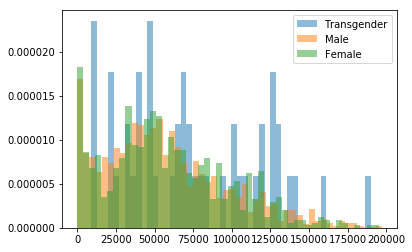

In [19]:
ind_tr, ind_m, ind_w = [],[],[]
for c,i in enumerate(public_csv['Gender'].get_values()):
    if type(i) == type(1.1):
        continue
    if 'transgender' in i.lower():
        ind_tr.append(c)
    if 'male' in i[:5].lower():
        ind_m.append(c)
    if 'female' in i.lower():
        ind_w.append(c)


plt.hist(public_csv.iloc[ind_tr]['Salary'].dropna(), label = 'Transgender', normed = True, alpha = 0.5, bins = 50)
plt.hist(public_csv.iloc[ind_m]['Salary'].dropna(), label = 'Male', normed = True, alpha = 0.5, bins = 50)
plt.hist(public_csv.iloc[ind_w]['Salary'].dropna(), label = 'Female', normed = True, alpha = 0.5, bins = 50)
plt.legend()
plt.show()

In [20]:
sys.stdout.write('Средняя зарплата женщин:\n%d $\
                 \nCредняя зарплата мужчин:\n%d $ \
                 \nСредняя зарплата трансгендеров:\n%d $\
                 '%(np.mean(public_csv.iloc[ind_w]['Salary'].dropna()),
                    np.mean(public_csv.iloc[ind_m]['Salary'].dropna()),
                    np.mean(public_csv.iloc[ind_tr]['Salary'].dropna())))


Средняя зарплата женщин:
58516 $                 
Cредняя зарплата мужчин:
56970 $                  
Средняя зарплата трансгендеров:
74420 $                 

## Приложение

In [21]:
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
soup = BeautifulSoup(urllib.request.urlopen(url).read().decode('utf-8'))
tables = soup.findAll("table", { "class" : "wikitable" })

for tn in range(len(tables)):
    row_len = [len(r.findAll(['th','td'])) for r in tables[tn].findAll("tr")]
    wikitable = []
    for i in range(len(tables[tn].findAll("tr"))):
        row = []
        for j in range(max(row_len)):
            row.append('')
        wikitable.append(row)
    for i in range(len(tables[tn].findAll("tr"))):
        row = []
        cells = tables[tn].findAll("tr")[i].findAll(["td", "th"])
        for j in range(len(cells)):
            for k in range(int(cells[j].get('rowspan',1))):
                for l in range(int(cells[j].get('colspan',1))):
                    wikitable[i+k][j+l] += cells[j].text
        wikitable.append(row)

In [22]:
popinf = pd.DataFrame(wikitable[1:],columns=['-', 'Country', 'Population','-','-','-'])
popinf.index = popinf['Country']
popinf['Population'].head()

Country
 China[Note 2]            1,389,190,000
 India[Note 3]            1,327,810,000
 United States[Note 4]      326,615,000
 Indonesia                  261,890,900
 Pakistan                   210,564,000
Name: Population, dtype: object